测试sklearn决策树。

# DecisionTreeClassifier

## 基础使用

In [1]:
# 测试决策树
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建决策树分类器
clf = DecisionTreeClassifier(random_state=42)

# 训练模型
clf.fit(X_train, y_train)

# 预测测试集
y_pred = clf.predict(X_test)

# 得分
score = clf.score(X_test, y_test)
score

1.0

## 调参

In [2]:
# 决策树调参
from sklearn.model_selection import GridSearchCV

# 定义参数范围
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 创建网格搜索对象
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.9583333333333334


## 可视化

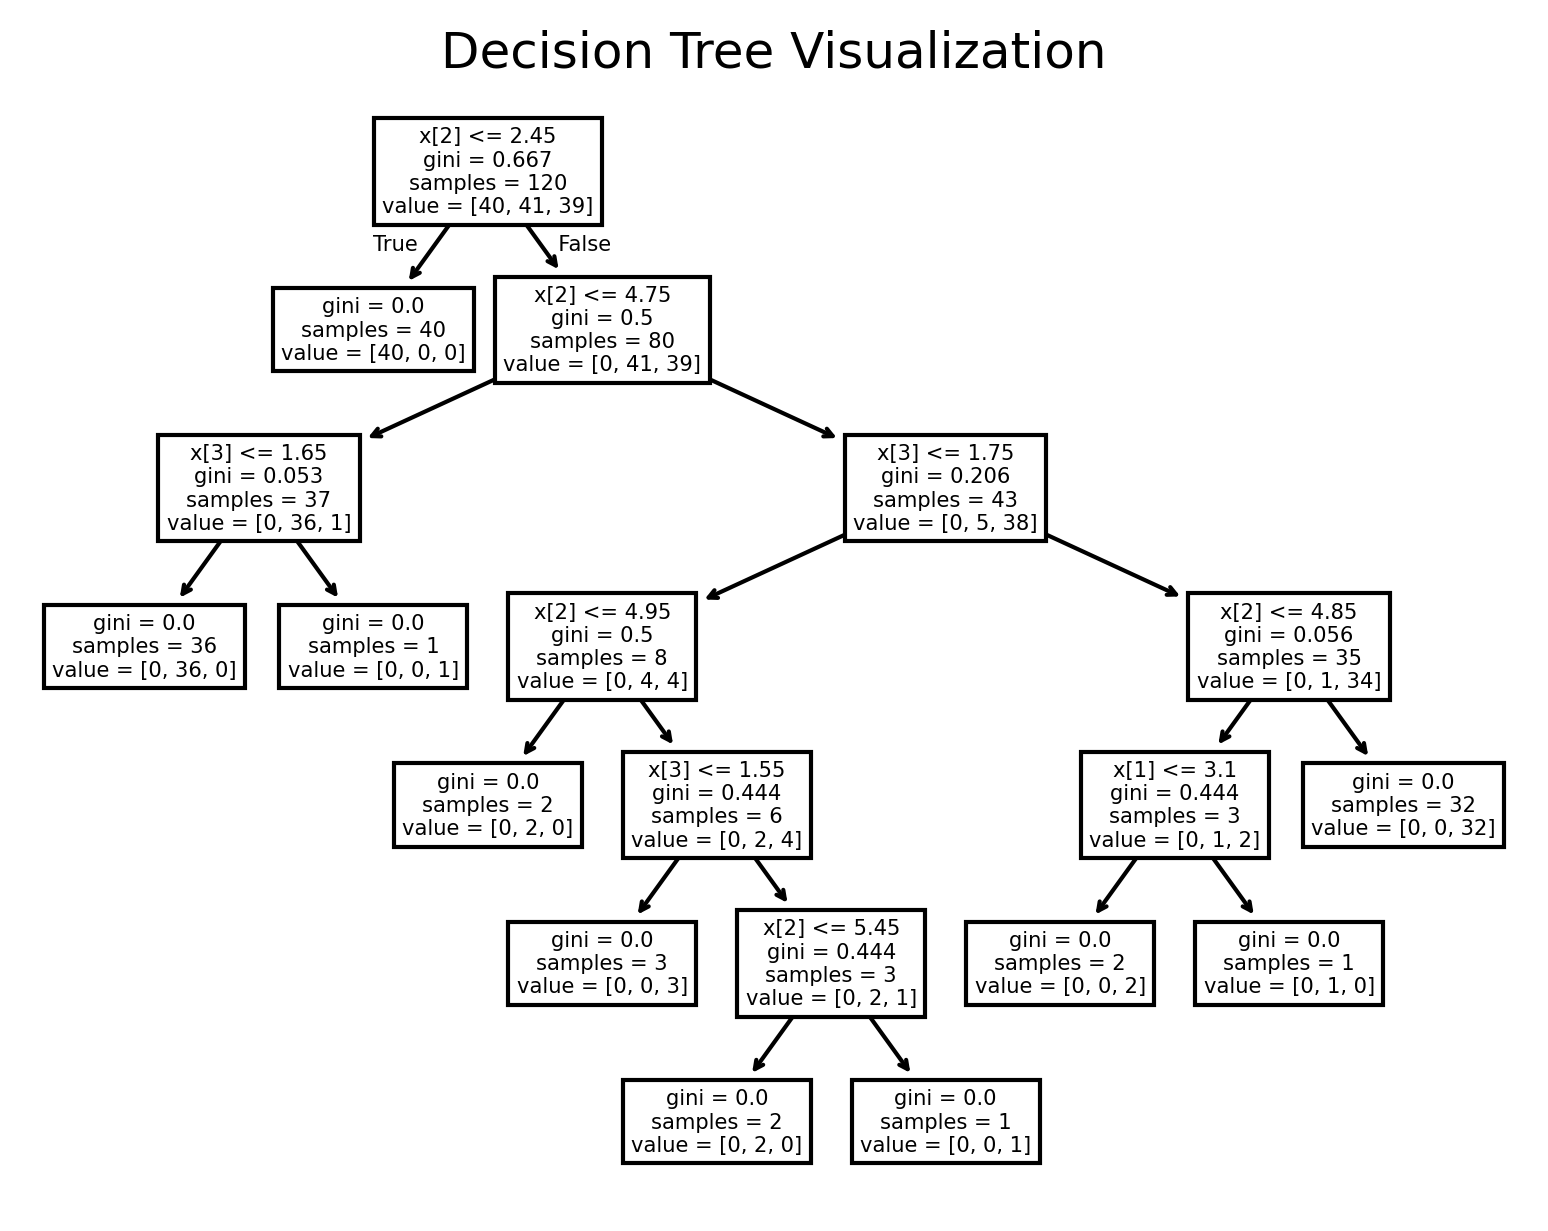

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 可视化决策树
plt.figure(dpi=300)
plot_tree(clf)
plt.title("Decision Tree Visualization")
plt.show()

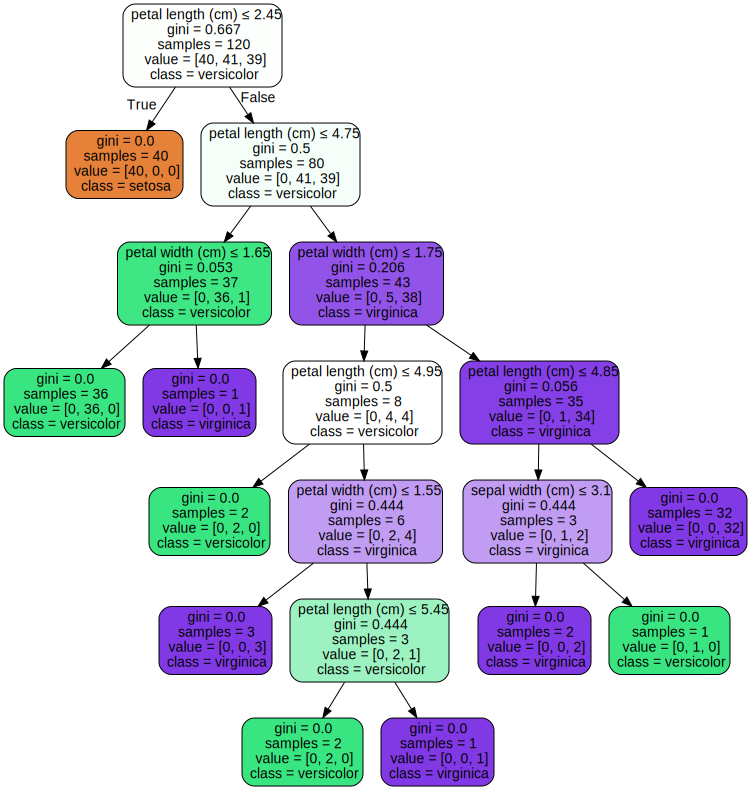

In [12]:
import graphviz
from sklearn import tree
# 调整画布大小
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# DecisionTreeRegressor

## 基础使用

In [13]:
# 测试DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# 生成回归数据集
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# 划分训练集和测试集
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 创建决策树回归器
regressor = DecisionTreeRegressor(random_state=42)

# 训练模型
regressor.fit(X_train_reg, y_train_reg)

# 预测测试集
y_pred_reg = regressor.predict(X_test_reg)

# 得分
regression_score = regressor.score(X_test_reg, y_test_reg)
print("Decision Tree Regression Score:", regression_score)

Decision Tree Regression Score: 0.999032925486188
